In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler

In [17]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test)


X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_normalized, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalized, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalized, dtype=torch.float32)

In [19]:
# Define your neural network model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


# Initialize the model
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1

model = NeuralNet(input_size, hidden_size, hidden_size, output_size)

In [4]:
model

NeuralNet(
  (fc1): Linear(in_features=9, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [20]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/2000, Loss: 0.5035839080810547
Epoch 2/2000, Loss: 0.49972984194755554
Epoch 3/2000, Loss: 0.4959082007408142
Epoch 4/2000, Loss: 0.49211812019348145
Epoch 5/2000, Loss: 0.48835834860801697
Epoch 6/2000, Loss: 0.4846284091472626
Epoch 7/2000, Loss: 0.4809299111366272
Epoch 8/2000, Loss: 0.47725874185562134
Epoch 9/2000, Loss: 0.47361549735069275
Epoch 10/2000, Loss: 0.47000086307525635
Epoch 11/2000, Loss: 0.4664144217967987
Epoch 12/2000, Loss: 0.4628584682941437
Epoch 13/2000, Loss: 0.4593331813812256
Epoch 14/2000, Loss: 0.4558359980583191
Epoch 15/2000, Loss: 0.45236653089523315
Epoch 16/2000, Loss: 0.44892528653144836
Epoch 17/2000, Loss: 0.4455116391181946
Epoch 18/2000, Loss: 0.4421249032020569
Epoch 19/2000, Loss: 0.438764750957489
Epoch 20/2000, Loss: 0.43543165922164917
Epoch 21/2000, Loss: 0.43212392926216125
Epoch 22/2000, Loss: 0.42884156107902527
Epoch 23/2000, Loss: 0.42558562755584717
Epoch 24/2000, Loss: 0.4223529100418091
Epoch 25/2000, Loss: 0.419144392013549

In [23]:
# Make predictions on the test data
with torch.no_grad():
    predicted_scaled = model(X_test_tensor)

In [24]:
predicted_unscaled = scaler_Y.inverse_transform(predicted_scaled)

In [41]:
compare_df = pd.DataFrame(predicted_unscaled, columns=['predicted'])
compare_df['actual'] = y_test.values

In [43]:
compare_df.head(10)

,predicted,actual
0,90.121671,89.959033
1,90.339586,90.590392
2,89.882570,88.761667
3,90.254233,90.777612
4,90.109594,90.116769
5,90.230704,90.428091
6,90.446650,91.709526
7,89.841839,89.376526
8,90.245340,90.828132
9,90.157983,90.003263


<Axes: >

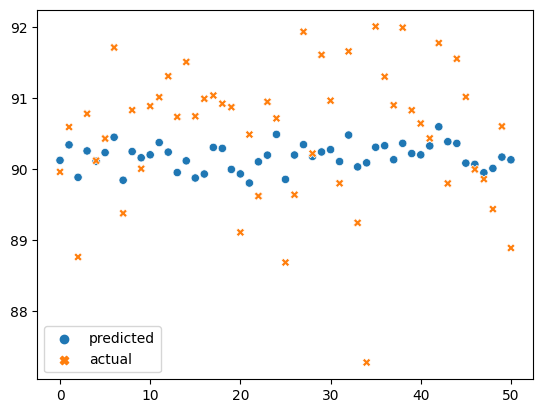

In [46]:
sns.scatterplot(compare_df)